In [6]:
import PIL
from random import randint

In [0]:
import numpy as np
import cv2
#from contour_custom_library import * #customised dicom-contour.contour
from PIL import Image
from scipy.misc import toimage
%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob



(180, 180)


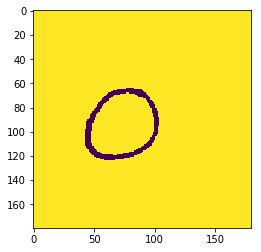

In [0]:
img = cv2.imread(r'D:\Machine Learning\Bangla Digit\train\0\a04569.png',0)
imgMain = cv2.imread(r'D:\Machine Learning\Bangla Digit\train\0\a04569.png')
#img.show()
np.array(img).shape
ret,thresh1 = cv2.threshold(np.array(img),127,255,cv2.THRESH_BINARY)
print(thresh1.shape)
(thresh1.T[0]).shape
plt.imshow(thresh1)

In [0]:
#print(len(thresh1[thresh1!=0]))
print(len(thresh1[thresh1==0]))
#print(len(thresh1[thresh1!=255]))
print(len(thresh1[thresh1==255]))

772
31628


In [0]:
val = 0
thresh1[thresh1==0] = val

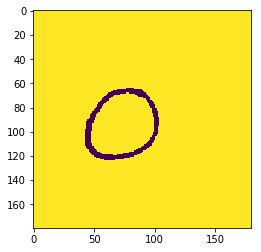

In [0]:
plt.imshow(thresh1)

In [0]:
x = thresh1
x[x==val] = 150

In [0]:
imgTemp = np.stack((thresh1,thresh1,x))

In [0]:
imgTemp.T.shape

(180, 180, 3)

In [0]:
#cv2.imshow('imgTemp', imgTemp.T) hang kore pc
img = Image.fromarray(imgTemp.T, 'RGB')

In [0]:
cv2.imwrite('01.png',(imgTemp.T))

True

In [0]:
img.show()

In [0]:
import numpy as np
from PIL import Image
a = input("img: ")
img = Image.open(r'D:\Machine Learning\Bangla Digit\train\7\\'+a+'.png')

def colorize_digits(img_src, color, threshold=185):
    img = Image.open(img_src)
    ret,im = cv2.threshold(np.array(img),threshold,255,cv2.THRESH_BINARY)
    data = np.array(im)
    if(len(data[data==0])>len(data[data==255])): ## assuming, total pixels covering the letters is less than not covering. 
        ret,im = cv2.threshold(np.array(img),threshold,255,cv2.THRESH_BINARY_INV)
        data = np.array(im)
        
    #print(data.shape)
    if(len(data.shape)==2):
        #print(data.shape)
        data = np.stack((data,)*3, axis=-1)
    #print(data.shape)
        
    r1, g1, b1 = 0, 0, 0 # Original value
    #if(len(data[data==0])>len(data[data==255])):
    #    r1, g1, b1 = 255, 255, 255
    r2, g2, b2 = color # Value that we want to replace it with

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    #mask = (red == r1) & (green == g1) & (blue == b1)
    mask = (red == r1) | (green == g1) | (blue == b1)
    #print(mask[0])
    data[:,:,:3][mask] = [r2, g2, b2]

    im = Image.fromarray(data)
    return im
    #im.save('fig1_modified.png')
    #im.show()
colorize_digits((r'D:\Machine Learning\Bangla Digit\train\7\\'+a+'.png'), [255,0,0]).show()

img: a00107


In [0]:
colors_dict = {}

In [0]:
colors_dict['red'] = [255,0,0]
colors_dict['lime'] = [0,255,0]
colors_dict['blue'] = [0,0,255]
colors_dict['maroon'] = [128,0,0]
colors_dict['yellow'] = [255,255,0]
colors_dict['black'] = [0,0,0]
colors_dict['magenta'] = [255,0,255]
colors_dict['deep pink'] = [255,20,147]
colors_dict['brown'] = [165,42,42]
colors_dict['yellow green'] = [154,205,50]

In [0]:
for i in colors_dict:
    print(colors_dict[i])
    colorize_digits(img, colors_dict[i]).show()

In [0]:
base_dir = r'D:\Machine Learning\Bangla Digit\generated_test_1'

In [0]:
j=0
x = randint(0, 9)
y = randint(0, 9)
z = randint(0, 9)
for i in colors_dict:
    print(colors_dict[i])
    if(j==x or j==y or j==z):
        j+=1
        continue
    save_dir = base_dir+'\\'+ i +'\\'+str(j)+'.png'
    colorize_digits(img, colors_dict[i]).save(save_dir)
    j+=1

In [0]:
from glob import glob
base_dir = r'D:\Machine Learning\Bangla Digit\train'
save_dir = r'D:\Machine Learning\Bangla Digit\generated_test_1'

for i in range(10): # 0 to 9
    generate_image_1(base_dir, i)
    
def generate_image_1(base_dir, image_number):
    i = image_number
    dir_2 = base_dir + '\\' + str(i) + '\*'
    paths = glob(dir_2)
    #print(dir_2)
    #print((paths))
    x = randint(0, 9)
    y = randint(0, 9)
    z = randint(0, 9)
    for img_path in paths:
        j=0
        for color in colors_dict:
            #print(colors_dict[color])
            if(j==x or j==y or j==z):
                j+=1
                continue
            img_name = img_path.split('\\')[-1]
            save_dir_2 = save_dir+'\\'+ str(i) + '\\' + color +'\\'+img_name
            #print(img_path)
            colorize_digits(img_path, colors_dict[color]).save(save_dir_2)
            j+=1



In [24]:
def random_label_gen(digit_str, color):
    x = randint(0, 3)
    label = color + ' ' + digit_str
    if x==0:
        label = 'digit ' + digit_str + ' of color ' + color
    elif x==1:
        label = digit_str + ' of color ' + color
    elif x==2:
        label = digit_str + ' ' + color
    elif x==3:
        label = color + ' ' + digit_str
    return label

In [26]:
from glob import glob
dir_ = r'D:\Machine Learning\Bangla Digit\generated_test_1\*\*\*'
paths = glob(dir_)
labels = []
for path in paths:
    digit_str = path.split('\\')[-3]
    color = path.split('\\')[-2]
    labels.append(random_label_gen(digit_str, color))


In [27]:
len(labels)

438421